***IMPORTANT***: This .ipynb notebook and the `utils.py` file must be in the same folder to let the code contained in this notebook work

In [1]:
import numpy as np
import pandas as pd

### Question 1: Prepare the data for the training

First of all, let's load the dataset from the hard drive

In [2]:
df = pd.read_csv('experimental_dataset_2.csv')

Let's now have a look to the data characteristics

In [3]:
df.describe()

,GFR,LFR,Temp,CO2alpha,CO2pp,Height,kGa,eta
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,54.995937,0.599977,59.998997,0.225013,10.498883,17.501333,0.759702,0.732292
std,26.019523,0.231375,11.567128,0.130139,5.493646,7.227118,0.537892,0.203811
min,10.138000,0.201000,40.097000,0.001000,1.030000,5.000000,0.015059,0.471522
25%,32.545000,0.400250,50.010250,0.112750,5.775750,11.275000,0.344674,0.533604
50%,55.032500,0.599000,59.968000,0.224500,10.505500,17.550000,0.650313,0.684269
75%,77.391250,0.800500,70.002500,0.336500,15.224750,23.725000,1.004768,0.967514
max,99.964000,0.998000,79.999000,0.449000,19.945000,29.900000,2.234941,1.000000


Therefore, the dataset has 8 columns and each column has 300 datapoints. The dataset does not have any missing point.<p>
Other important information can be obtained visualizing the data distribution

array([[<Axes: title={'center': 'GFR'}>, <Axes: title={'center': 'LFR'}>,
        <Axes: title={'center': 'Temp'}>],
       [<Axes: title={'center': 'CO2alpha'}>,
        <Axes: title={'center': 'CO2pp'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'kGa'}>, <Axes: title={'center': 'eta'}>,
        <Axes: >]], dtype=object)

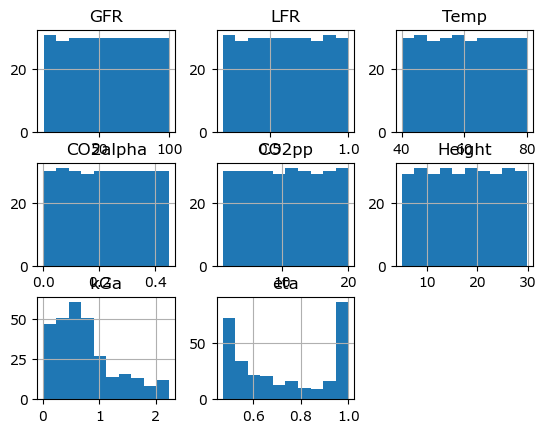

In [4]:
df.hist()

Following, let's select the input and the output of our model

In [5]:
X = df[['GFR', 'LFR', 'Temp', 'CO2alpha', 'CO2pp', 'Height']]
Y = df[['kGa', 'eta']]

X = X.to_numpy()
Y = Y.to_numpy()

After the input and the output have been selected, it is time to scale them to a common range because they have very different values. For example, the temperature is in the range 40-80 while the GFR is in the range 100-1000. This could affect the performance of the trained model.<p>
For this reason, we standardize the data using method ``sklearn.preprocessing.StandardScaler``

In [6]:
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
Yscaler = StandardScaler()

Xsc = Xscaler.fit_transform(X)
Ysc = Yscaler.fit_transform(Y)

### Question 2: Generation of a test set to evaluate the performance of the model

The generation of a test set it is a very crucial step in the modelling pipeline. It saves a part of our data to evaluate the model performance. The data in the test set will not be used for the training.<br> This allows the designer to understand the model accuracy of the model on unseen cases, and to make decisions based on it.<p>
There are various way of generating a test set, however the main ones are two:
  * Random sampling: This apporach picks random values from our dataset and save them into a test set.
  * Physics based: This apporach picks values to be included in the test set using the physics of the system. For example, choose all the points with the temperature within a certain-range to make the training blind on that data and, following, evaluate the performance on them.

<p>
For this exercise, we will use *random sampling* employing the function ``sklearn.model_selection.train_test_split`` and selecting 20% of the original dataset points to be included in the test set.

In [7]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xsc, Ysc, test_size = 0.2, random_state = 0)


### Question 3: Train a model

We will train our model using Keras framework. It is a simple and robust framework to train and evaluate artificial neural networks.<p>
The network will take as input the process variables and the column dimensions (6 input) and will return the transfer coefficient (K<sub>G</sub>a) and the absorption efficiency (2 output). Its will have 3 hidden layers, each of them having 10 nodes. Therefore, the network will look like the following figure<br>
<center><img src="img/employed_ann.png"/></center>


The interal activation function will be ReLU and the output one will be linear.<br>
To train the ANN we will use the [ADAM optimizer](https://arxiv.org/abs/1412.6980) and the mean squared error metric<br>
$$
MSE=\frac{1}{N}\cdot\sum_{i=1}^{N} (Y_{i,exp} - y_{i,pred})^2
$$
The training will be executed with 500 epochs

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense

keras.utils.set_random_seed(0)

#Generation of the network structure
model = Sequential()
model.add(Dense(10, input_dim = Xtrain.shape[1], activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(Ytrain.shape[1], activation = 'linear'))

#Setting the parameters for the training
model.compile(loss='mean_squared_error', optimizer = 'adam')

#Execution of the training
model.fit(Xtrain, Ytrain, epochs = 500)

Epoch 1/500
8/8 [==============================] - 1s 4ms/step - loss: 1.0533
Epoch 2/500
8/8 [==============================] - 0s 2ms/step - loss: 1.0308
Epoch 3/500
8/8 [==============================] - 0s 11ms/step - loss: 1.0139
Epoch 4/500
8/8 [==============================] - 0s 10ms/step - loss: 0.9992
Epoch 5/500
8/8 [==============================] - 0s 2ms/step - loss: 0.9847
Epoch 6/500
8/8 [==============================] - 0s 2ms/step - loss: 0.9702
Epoch 7/500
8/8 [==============================] - 0s 2ms/step - loss: 0.9574
Epoch 8/500
8/8 [==============================] - 0s 2ms/step - loss: 0.9433
Epoch 9/500
8/8 [==============================] - 0s 2ms/step - loss: 0.9291
Epoch 10/500
8/8 [==============================] - 0s 2ms/step - loss: 0.9147
Epoch 11/500
8/8 [==============================] - 0s 2ms/step - loss: 0.8997
Epoch 12/500
8/8 [==============================] - 0s 2ms/step - loss: 0.8842
Epoch 13/500
8/8 [==============================] - 0s 2ms/

### Question 4: Model evaluation

*Evaluate the training performance on the test set using mean squared error (MSE) and coefficient of determination (R2) metrics.*

After the training, its time to evaluate the performance of our model. It is important to evaluate the model on the test set rather than the train set, because in this way it is possible to assess the generalization capabilities of the model.<p>
This is done executing the prediction of the model on the test point, and comparing them with the experimental value contained in the dataset. The prediction is done thorugh the command `model.predict`.<br> 
Following, the obtained predictions values must be converted to the original scale to the original scale in order to have the actual value of the errors. In fact, to train the model the variables have been scaled through the standard scaler in order to increase the model prediction accuracy. The re-conversion to the original scale is done using the command `Yscaler.inverse_transform`.<br>
The comparison is done through the MSE and the R<sup>2</sup> metrics, importing the ` mean_squared_error`and the `r2_score` from `sklearn.metrics`.

In [9]:
#Importing the needed functions
from sklearn.metrics import mean_squared_error, r2_score

#Prediction on model on the test set
Ytest_pred = model.predict(Xtest)

#Rescaling the values to the physical scale
Ytest_real = Yscaler.inverse_transform(Ytest)
Ytest_pred = Yscaler.inverse_transform(Ytest_pred)

#Calculating the values of the metrics
r2_test = r2_score(Ytest_real, Ytest_pred)
mse_test = mean_squared_error(Ytest_real, Ytest_pred)

#Displaying the results
print('R2 score:', r2_test)
print('MSE score:', mse_test)

2/2 [==============================] - 0s 6ms/step
R2 score: 0.9542073848724775
MSE score: 0.006332700760389548


The closest the R<sup>2</sup> value is to one, the more accurate is the model. The lower is the MSE value, the more accurate is the model.<br>
In this case, the model performance are very good. This results are obtained on the test set, that are values that the model has never seen during the training.

Another way of visualizing the data, is through the parity plot. In this plot, the experimental value is reported on the x-axis, while the prediction for the same value is reported on the y-axis. The closer are the value to the line with slope 1, the more accurate our model is.<br>
Moreover, in this kind of plot it is possible to graphically compare the performance on various sets (i.e., train and test sets).<p>
The case in this exercise, takes into account two variables (K<sub>G</sub>a and eta), therefore we will have two parity plots.<br>
The parity plot can be created using the library ``matplotlib``, however this is out of the scope of this exercise. For this reason, we have created a function to generate them included in the library ``utils.py`` included in this exercise. 

2/2 [==============================] - 0s 4ms/step


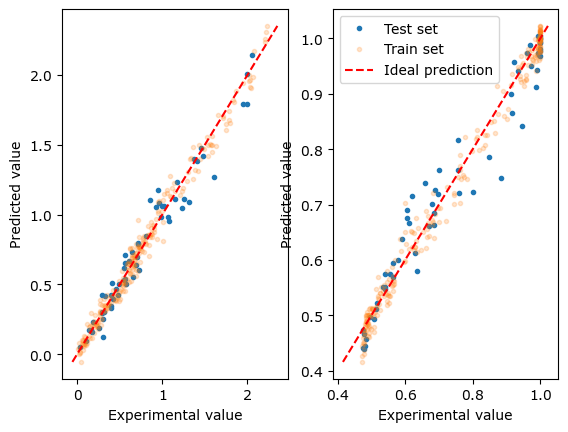

In [10]:
#Importing the needed library
from utils import parity_plot

#Predicting the values on the train and test set
Ytrain_pred = model.predict(Xtrain)
Ytest_pred = model.predict(Xtest)

#Scaling the value from the training scale to the physical scale
Ytrain_real = Yscaler.inverse_transform(Ytrain)
Ytrain_pred = Yscaler.inverse_transform(Ytrain_pred)
Ytest_real = Yscaler.inverse_transform(Ytest)
Ytest_pred = Yscaler.inverse_transform(Ytest_pred)

#Executing the plot
parity_plot(Ytrain_real, Ytest_real, Ytrain_pred, Ytest_pred)

Also the partity plots confirm that the model performance are quite accurate and not significant difference can be detected between train and test set.

### Question 5: Design the column

After the training of the model, it is time to use it.<br>
The exercise asks us to design a column that is able to work with a gas having the following characteristics:
* Gas flow rate: 20 000 m<sup>3</sup>/h
* CO<sub>2</sub> partial pressure: 10 kPa
* CO<sub>2</sub> loading in the absorption amine: 0.1 molCO<sub>2</sub>/molAmine

To simplify the code, this exercise provides an optimization toolkit already embedding the function to be maximized and the optimization algorithm. They are contained in the class ``ModelWrapper``. Following, you can find more information them:
* *Optimization function*: the ``ModelWrapper`` class aim minimizing the following function: $-K_Ga$. Therefore, the function aim the maximization of the K<sub>G</sub>a value. This is done because an high K<sub>G</sub>a translate in higher CO<sub>2</sub> transfer from the gas-phase to the liquid-phase. This means lower column volumes and much lower capital investment and operational costs.
* *Optimization algorithm*:  the ``ModelWrapper`` class employs a [differential evolution algorithm](https://en.wikipedia.org/wiki/Differential_evolution)(DE) finilized by a [gradient-based optimization](https://en.wikipedia.org/wiki/Gradient_method) on the best identified particle. The DE algorithm employs many particle for the search of the optimum, this way the chance of getting the global optimum are higher.

Let's import all the needed function and let's add the constraint on the CO<sub>2</sub> partial pressure and the CO<sub>2</sub> loading within the liquid at the column inlet.

In [11]:
#Importing the toolkit from the optimization
from utils import ModelWrapper

PCO2 = 10       #CO2 partial pressure contraint value
CO2_alpha = 0.1 #CO2 loading at the column inlet constraint value

Let's initialize the ``ModelWrapper`` for the case in analysis. It requires the trained model and the scaler for the X and Y variable.

In [12]:
wrapper = ModelWrapper(model, Xscaler, Yscaler)

After this we can focus on the optimization. The DE optimizer requires the bounds within which the serach has to take place.<br>
The data-driven model have good prediction capabilities within their train bounddaries. Therefore, we will set as boundaries for the search the boundaries of each input variable within the dataset.<br>
The bounds must be contained in a matrix where each row is a variable, the 1<sup>st</sup> column is the minimum bound, and the 2<sup>nd</sup> column is the maximum bound.<p> Moreover, it also requires the index of the rows containing the CO<sub>2</sub> partial pressure and the CO<sub>2</sub> loading. This way, it can contraint the values to the desired ones.

To ease the work of getting the bounds, we can use the command ``df.describe().loc[['min', 'max']]`` to get the minimum and the maximum values of the columns within our databse

In [13]:
df.describe().loc[['min', 'max']]

,GFR,LFR,Temp,CO2alpha,CO2pp,Height,kGa,eta
min,10.138,0.201,40.097,0.001,1.030,5.0,0.015059,0.471522
max,99.964,0.998,79.999,0.449,19.945,29.9,2.234941,1.000000


Now we can create the matrix copying the information from the above table. Only the values for the input variables has to be copied, therefore we must stop at the column `Height`.<br>
Moreover, we will also set the position of CO2pp and CO2alpha rows within our dataset within a variable to be used as input for the optimization

In [14]:
bounds = np.array([
                   [10.138, 99.964],     #Bounds for GFR       ----- Position 0
                   [0.200, 0.998],       #Bounds for LFR       ----- Position 1
                   [40.097, 79.999],     #Bounds for Temp      ----- Position 2
                   [0.001, 0.449],       #Bounds for CO2alpha  ----- Position 3
                   [1.030, 19.945],      #Bounds for CO2pp     ----- Position 4
                   [5.0, 29.9]           #Bounds for height    ----- Position 5
                   ])
position_CO2pp = 4
position_CO2alpha = 3

Now that everything is set, we can start the optimization giving the required input to the method `maximize_KGa` of the `wrapper`.

In [15]:
res = wrapper.maximize_KGa(bounds,
                    position_CO2pp, PCO2,
                    position_CO2alpha, CO2_alpha)

The optimization successfully terminated. Let's have a look to the result

In [16]:
res

             message: Optimization terminated successfully.
             success: True
                 fun: -1.476126790046692
                   x: [ 9.980e+01  9.980e-01  4.026e+01  1.000e-01
                        1.000e+01  2.960e+01]
                 nit: 19
                nfev: 1210
          population: [[ 9.980e+01  9.957e-01 ...  1.000e+01  2.960e+01]
                       [ 9.663e+01  9.935e-01 ...  1.000e+01  2.954e+01]
                       ...
                       [ 9.860e+01  9.914e-01 ...  1.000e+01  2.956e+01]
                       [ 9.453e+01  9.936e-01 ...  1.000e+01  2.945e+01]]
 population_energies: [-1.476e+00 -1.471e+00 ... -1.462e+00 -1.466e+00]
                 jac: [ 0.000e+00 -0.000e+00  0.000e+00        nan
                              nan  0.000e+00]

The optimizer returns a lot of information, however what we need in only for the scope of this exercise, is only the `x`. Therefore, let's save the values in a variable that will be used within the code. We will call this variable `best_x`

In [17]:
best_x = res.x

Our optimal parameters are

In [18]:
print('Optimal GFR_Area:', best_x[0],'m3/(m2*h)')
print('Optimal LFR_Area:', best_x[1],'L/(m2*h)')
print('Optimal Temperature:', best_x[2],'C')
print('Optimal Height:', best_x[-1],'m')

Optimal GFR_Area: 99.80190360749296 m3/(m2*h)
Optimal LFR_Area: 0.998 L/(m2*h)
Optimal Temperature: 40.258728035916576 C
Optimal Height: 29.604603555114004 m


How does the variable position within the investigation space? We can use a visualization to have this informationa at a glance.<br>
To do it, we will use the function `visualize_solution` contained in the file `utils`. It requires the identified solution and the dataframe containing the data.

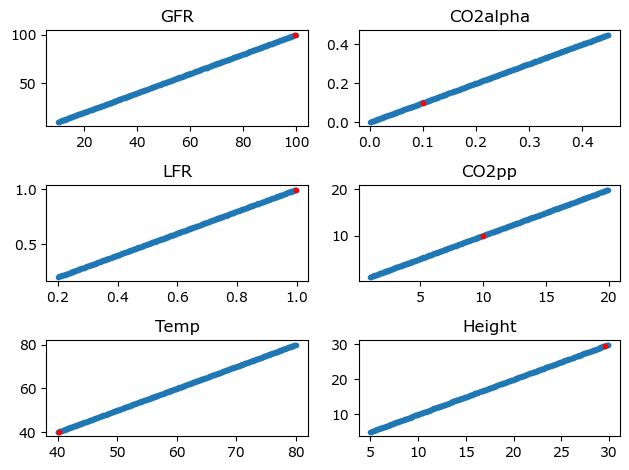

In [19]:
from utils import visualize_solution
visualize_solution(best_x, df)

Therefore, our solution is placed at high GFR and LFR, low temperature and requires an high column height. We will come back on the column height later.

Now it is time to design our column. We have identified the best process configuration giving the CO<sub>2</sub> partial pressure and the CO<sub>2</sub> loading as constraint. However, there is still a requirement to be respected that is the flow rate of gas to be processed.<br>
From its value we can calculate the cross-section area of the column. We are asked to process 20 000 m<sup>3</sup>/h of gas, however the optimal solution gives us the optimal cross-section flow rate to maximize the K<sub>G</sub>a in m<sup>3</sup>/(m<sup>2</sup>h). We can use this value to calculate the column cross-section area

In [20]:
GFR = 2_000 

GFR_Area_opt = best_x[0] #m3(m2*h)
Area = GFR/GFR_Area_opt   #m2
Dcolumn = 2*np.sqrt(Area)/np.pi
print('Column cross-section area:', Area, 'm2')
print('Column diameter:', Dcolumn, 'm')

Column cross-section area: 20.039697918646148 m2
Column diameter: 2.8498743221076404 m


From the cross-section area we can also calculate the required liquid flowrate

In [21]:
LFR_Area_opt = best_x[1] #L/(m2*h)
LFR = LFR_Area_opt*Area
print('Liquid flowrate:', LFR, 'L/h')

Liquid flowrate: 19.999618522808856 L/h


What about the efficiency? We can calculate the expected efficiency using the identified optimal condition and the trained model. The prediction code is simplified using the `wrapper.prediction` function

In [22]:
wrapper.predict(best_x)

array([[1.4761268, 1.007881 ]], dtype=float32)

The efficiency of the obtained column is around 1. The returned value is above 1, however in the parity plot it is possible to see that the error in that area is around +/- 2%, therefore, the efficeincy is between 0.98 and 1.